# 2nd Assignment

ReadMe:
https://github.com/umaimehm/Intro_to_AI_2021/blob/main/assignment2-machinelearning/README.md

Tesla .csv:
https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv

## Regression or classification?

As the data is not clustered, I see the only way to solve the 1st case is to use regression. 

Classification is in its "name", it divides the dataset into classes based on parameters and therefore categorizes the data into classes. A good example of its usecase can be spam-mails, here it uses its classes to identify if the mail has a repeating sentence or something in similarities of other spams, then can proceed to put it in spam.

Regression finds the correlations between variables. So it can predict continuous variables such as market trends. A good example I can think of is maybe weather forecast. It is possible to use regression to predict the weather for the future. If we used classification to predict the weather, its output would only be if it would be colder or warmer, not an exact temperature.

In [1]:
#Imports:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

#Removing Warinings, they are kinda annoying
import warnings
warnings.filterwarnings("ignore")

#Sklearn imports that is going to be used for the 2nd model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Importing the data from Github
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
df = pd.read_csv(url, sep=',')

#Here I choose to check the tail to see how many lines we got
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
2844,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB


In [4]:
#I want to change the date so the times on the plots shows as years rather than indexes
#To be able to do this I will make another df (plot_df), which will only be used for plotting

plot_df = df[["Date", "Close"]]
plot_df["Date"] = pd.to_datetime(plot_df["Date"])
plot_df.set_index("Date", inplace=True)

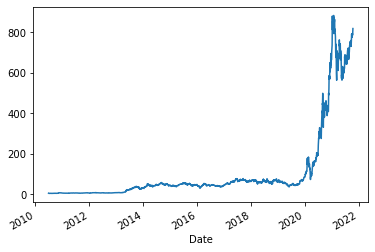

In [5]:
plot_df["Close"].plot()
plt.xlabel("Date")
plt.show()

Looks like we got data since Tesla was anything from Github, I won't train my algoritm based on all of 2845 days, since the early times for Tesla wasn't so popular, I will start from an approximately when Tesla started to get some hype. Based on the plot I just drew, it looks like they started to get some hype from 2018-2020

#### New data will be set dates from: 1.1.2018 - 31.10.2021 

And I will be using this data further in the assignment

In [6]:
#Importing data from yFinance
url = "https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1514764800&period2=1635638400&interval=1d&events=history&includeAdjustedClose=true"
df = pd.read_csv(url, sep=',') 

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
960,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100
961,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000
962,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500
963,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200
964,2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400


Now we have 965 days, which is much more workable

## Visualization of data

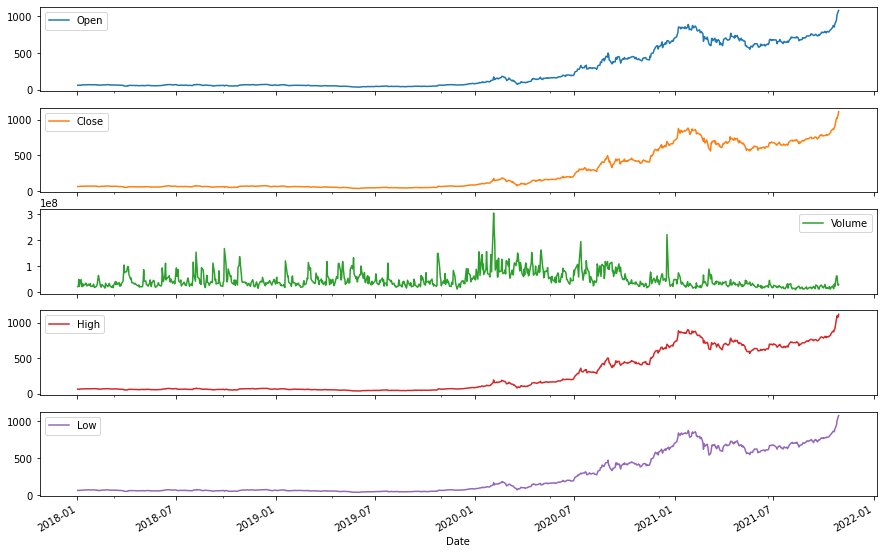

In [7]:
plot_df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]
#Converting Date to Datetime, so we can get x-axis to be nicer
plot_df["Date"] = pd.to_datetime(plot_df["Date"])
plot_df.set_index("Date", inplace=True)

cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = plot_df[cols].plot(figsize=(15, 10), subplots = True) #Subplotting to get seperate plots, also sizing plots to be longer
plt.show()

As I can see, there isn't really sooo much of any difference between Open, Close, High and Low. I will in this assignment just use the Close values for LinearRegression. Volume is just interesting, but won't be used in my case

### Data validation

I want to start with just looking at what we got of datatypes, and if we got any NaN or null

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       965 non-null    object 
 1   Open       965 non-null    float64
 2   High       965 non-null    float64
 3   Low        965 non-null    float64
 4   Close      965 non-null    float64
 5   Adj Close  965 non-null    float64
 6   Volume     965 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.9+ KB


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

By the looks of it, it looks perfectly good, no null and the data is good to go, but I do want to change Date to int and remove "-", so when we are going to later predict on a date, we can write the prediction date with YYYYMMDD format in int.

In df, I just want to have Date and Close aswell

In [10]:
df.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis="columns", inplace=True)

df["Date"] = df['Date'].str.replace("-", "")
df = df.astype({"Date": int, "Close": float})

Now for the regObject, I'll need x, y values.

Here I'll choose Date as x and Close as y 

In [11]:
x = df.drop("Close", axis="columns")
y = df.Close

x.head()

,Date
0,20180102
1,20180103
2,20180104
3,20180105
4,20180108


## Creating linear model (using LinearRegression())

In [12]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

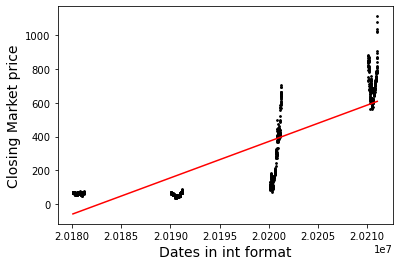

In [13]:
# matplotlib labels
plt.xlabel('Dates in int format',fontsize=14)
plt.ylabel('Closing Market price',fontsize=14)

# Visual Represention of linear equation with Linear Regression
plt.scatter(df.Date, df.Close, color = 'k', s=3)
plt.plot(df.Date, model.predict(df[['Date']]), color='red')

The reason the plot looks like this is because the way we formatted the dates to int. We formatted it in YYYYMMDD, which means that month doesn't go over 12 and days doesn't go over 31. This means that there is alot of empty space after these dates. I would have used another way to train the model and plot, but since we were going to input a date, and the program is then going to give us estimation of what the stock is, I couldn't come up with doing anything different

In [14]:
#Here we can write whatever date we want to predict the stock price
# in YYYYMMDD format
#Just for fun I chose to write 2025, 12th month, 21st day

model.predict([[20251221]])

array([1476.72888507])

So this was one way to make a model like this, and I cant get the MSE of this model since I haven't splitted the data between test data and prediction. So I made one more model, like we have done it in the labs.

In [15]:
#Test size will be 10% of the data we have, just to get a more accurate model

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [16]:
lr = LinearRegression()  # create object for the class
lr.fit(X_train, y_train)  # perform linear regression
Y_pred = lr.predict(X_train)

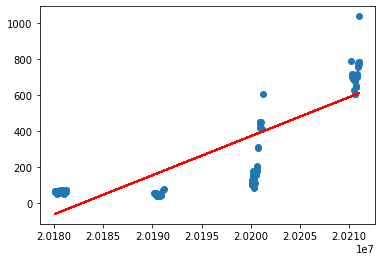

MSE = 21968.00389650894


array([1483.02647333])

In [17]:
Y_pred = lr.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))
lr.predict([[20251221]])

I wanted to predict the same date as I chose earlier to see if the models showed the same results, and they did not

### Inputs can be done here

To predict using the first model = model.predict([[YYYYMMDD]])

To predict using the second model = lr.predict([[YYYYMMDD]])